In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
BTVpolice = pd.read_csv('data/BTVpolice_cleaned.csv')

## Try mapping by different factors

date
2023-07-14    135
2023-07-21    133
2023-07-12    131
2023-09-07    128
2023-07-19    128
dtype: int64


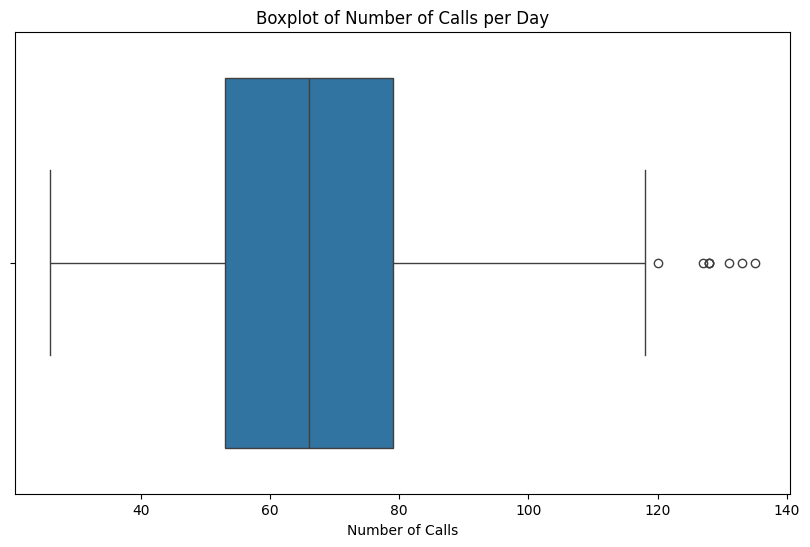

In [14]:
# Date
#Think about holidays/significant events
#Find outliers
BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'])
BTVpolice['date'] = BTVpolice['call_time'].dt.date
calls_per_day = BTVpolice.groupby('date').size()
mean_calls = calls_per_day.mean()
std_calls = calls_per_day.std()
outliers = calls_per_day[calls_per_day > (mean_calls + 2 * std_calls)]
outliers_sorted = outliers.sort_values(ascending = False)
print(outliers_sorted.head())

#Visualize outliers in boxplot
BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'])
BTVpolice['date'] = BTVpolice['call_time'].dt.date

calls_per_day = BTVpolice.groupby('date').size().reset_index(name='num_calls')

plt.figure(figsize=(10, 6))
sns.boxplot(x=calls_per_day['num_calls'])
plt.title('Boxplot of Number of Calls per Day')
plt.xlabel('Number of Calls')
plt.show()



Looking at the above dates, we can find that 7/14/2023 is the date with the most calls, and with a quick news search we can find that this was when flooding was a large problem in Burlington. Other outliers can likely be explained through similar reasons.

In [22]:
#Priority
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.cm as cm
from shapely.geometry import Polygon, mapping
import folium

# Sample data for each priority level
priorities = [1, 2, 3]
colors = ['plasma', 'viridis', 'cividis']  # Different color maps for each priority level

# Initialize the main map
burlington_map = folium.Map(location=[44.4759, -73.2121], zoom_start=13)

# Function to generate geojson data for a specific priority level
def create_geojson_for_priority(priority, colormap_name):
    BTVpolice_priority = BTVpolice[BTVpolice['priority'] == f"Priority {priority}"]
    BTVpolice_priority_filtered = BTVpolice_priority.dropna(subset=['Latitude', 'Longitude'])

    x = BTVpolice_priority_filtered['Longitude'].values
    y = BTVpolice_priority_filtered['Latitude'].values

    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]

    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values, bw_method=0.05)
    density = np.reshape(kernel(positions).T, xx.shape)

    contour_levels = np.linspace(density.min() + 0.0001, density.max(), 40)
    features = []

    colormap = cm.get_cmap(colormap_name, len(contour_levels))

    # Create GeoJSON features based on density contours
    fig, ax = plt.subplots()
    contours = ax.contour(xx, yy, density, levels=contour_levels)
    for i, level in enumerate(contours.collections):
        color = colormap(i / len(contour_levels))
        for contour_path in level.get_paths():
            for segment in contour_path.to_polygons():
                poly = Polygon(segment)
                if poly.is_valid:
                    feature = {
                        "type": "Feature",
                        "geometry": mapping(poly),
                        "properties": {
                            "level": contour_levels[i],
                            "color": f'rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, 0.4)' 
                        }
                    }
                    features.append(feature)
    plt.close(fig)  # Close the figure after creating contours to free memory
    
    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }
    return geojson_data

# Add GeoJSON layers for each priority level to the map
for priority, colormap_name in zip(priorities, colors):
    geojson_data = create_geojson_for_priority(priority, colormap_name)
    
    folium.GeoJson(
        geojson_data,
        name=f'Priority {priority}',
        style_function=lambda feature: {
            "fillColor": feature["properties"]["color"],
            "color": "black",
            "weight": 0.5,
            "fillOpacity": 0.1  # Adjust opacity for map visibility
        }
    ).add_to(burlington_map)

# Add a layer control to toggle between priorities
folium.LayerControl().add_to(burlington_map)

burlington_map


/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_29349/3591916660.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(colormap_name, len(contour_levels))
/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_29349/3591916660.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for i, level in enumerate(contours.collections):
/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_29349/3591916660.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(colormap_name, len(contour_levels))
/var/folders/05/

In [ ]:
#Drug-related, dv-related, alcohol-related, mental-health related

In [ ]:
# Call_type

In [ ]:
#Hour (histogram)

In [ ]:
#Day of week (histogram)


In [ ]:
#Month (histogram)

In [12]:
import pandas as pd

# Assuming your DataFrame is named `df`
# Find the row with the lowest X value
lowest_x_row = BTVpolice.loc[BTVpolice['X'].idxmin()]

# Find the row with the highest Y value
highest_y_row = BTVpolice.loc[BTVpolice['Y'].idxmax()]

print("Data point with the lowest X value:")
print(lowest_x_row)

print("\nData point with the highest Y value:")
print(highest_y_row)


Data point with the lowest X value:
X                            -8161816.637625
Y                             5552097.694176
incident_number                   24BU009166
call_type                Found/Lost Property
call_type_group               Public Service
call_time          2024-05-06 09:58:29+00:00
Street                             North Ave
call_origin                            Phone
mental_health                              0
drug_related                               0
dv_related                                 0
alcohol_related                            0
Area                                       A
AreaName                         NewNorthEnd
Latitude                            44.55732
Longitude                         -73.318846
Hour                  2024/09/06 09:00:00+00
DayOfWeek                             Monday
priority                          Priority 3
Month                                    May
ObjectId                              377775
date               